In [1]:
from pyspark.sql import SparkSession

In [3]:
import pandas as pd
data = pd.read_csv("cleaned_Cric_summary.csv")

data

,season,id,match_between,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,...,away_overs,away_runs,away_wickets,away_boundaries,home_key_batsman,home_key_bowler,away_key_batsman,away_key_bowler,part_of_the_day,1st_inning_runs
0,2022,1304047,CSK v KKR,CSK,KKR,KKR,BOWL FIRST,131/5,133/4,131/5,...,18.3,133.0,4.0,15.0,"MS Dhoni,Robin Uthappa","Dwayne Bravo,Mitchell Santner","Ajinkya Rahane,Sam Billings","Umesh Yadav,Varun Chakravarthy",night,131
1,2022,1304048,DC v MI,DC,MI,DC,BOWL FIRST,177/5,179/6,179/6,...,20.0,177.0,5.0,24.0,"Lalit Yadav,Axar Patel","Kuldeep Yadav,Khaleel Ahmed","Ishan Kishan,Rohit Sharma","Basil Thampi,Murugan Ashwin",day/night,177
2,2022,1304049,PBKS v RCB,PBKS,RCB,PBKS,BOWL FIRST,205/2,208/5,208/5,...,20.0,205.0,2.0,22.0,"Bhanuka Rajapaksa,Shikhar Dhawan","Rahul Chahar,Arshdeep Singh","Faf du Plessis,Virat Kohli","Mohammed Siraj,Harshal Patel",night,205
3,2022,1304050,GT v LSG,GT,LSG,GT,BOWL FIRST,158/6,161/5,161/5,...,20.0,158.0,6.0,22.0,"Rahul Tewatia,Hardik Pandya","Mohammed Shami,Varun Aaron","Deepak Hooda,Ayush Badoni","Dushmantha Chameera,Krunal Pandya",night,158
4,2022,1304051,SRH v RR,SRH,RR,SRH,BOWL FIRST,210/6,149/7,149/7,...,20.0,210.0,6.0,30.0,"Aiden Markram,Washington Sundar","Umran Malik,T Natarajan","Sanju Samson,Devdutt Padikkal","Yuzvendra Chahal,Prasidh Krishna",night,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2008,336012,RCB v MI,RCB,MI,MI,BOWL FIRST,122/9,126/1,122/9,...,16.0,126.0,1.0,16.0,"Cameron White,Vinay Kumar","Dale Steyn,Balachandra Akhil","Sanath Jayasuriya,Sachin Tendulkar","Dilhara Fernando,Dwayne Smith",day/night,122
931,2008,336019,PBKS v RR,PBKS,RR,RR,BOWL FIRST,221/3,180/7,221/3,...,20.0,180.0,7.0,26.0,"Shaun Marsh,James Hopes","Piyush Chawla,James Hopes","Niraj Patel,Yusuf Pathan","Shane Watson,Yusuf Pathan",night,221
932,2008,336038,DC v RR,DC,RR,DC,BOWL FIRST,192/9,87/10,87/10,...,20.0,192.0,9.0,29.0,"Tillakaratne Dilshan,Gautam Gambhir","Farveez Maharoof,Amit Mishra","Shane Watson,Yusuf Pathan","Shane Watson,Munaf Patel",night,192
933,2008,336039,CSK v PBKS,CSK,PBKS,PBKS,BAT FIRST,112/8,116/1,116/1,...,20.0,112.0,8.0,13.0,"Suresh Raina,Parthiv Patel","Manpreet Gony,Makhaya Ntini","Ramesh Powar,Wilkin Mota","Irfan Pathan,Vikram Singh",night,112


In [4]:
data['1st_inning_runs'] = data['1st_inning_score'].str.extract(r'^([^/]*)')
data

,season,id,match_between,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,...,away_overs,away_runs,away_wickets,away_boundaries,home_key_batsman,home_key_bowler,away_key_batsman,away_key_bowler,part_of_the_day,1st_inning_runs
0,2022,1304047,CSK v KKR,CSK,KKR,KKR,BOWL FIRST,131/5,133/4,131/5,...,18.3,133.0,4.0,15.0,"MS Dhoni,Robin Uthappa","Dwayne Bravo,Mitchell Santner","Ajinkya Rahane,Sam Billings","Umesh Yadav,Varun Chakravarthy",night,131
1,2022,1304048,DC v MI,DC,MI,DC,BOWL FIRST,177/5,179/6,179/6,...,20.0,177.0,5.0,24.0,"Lalit Yadav,Axar Patel","Kuldeep Yadav,Khaleel Ahmed","Ishan Kishan,Rohit Sharma","Basil Thampi,Murugan Ashwin",day/night,177
2,2022,1304049,PBKS v RCB,PBKS,RCB,PBKS,BOWL FIRST,205/2,208/5,208/5,...,20.0,205.0,2.0,22.0,"Bhanuka Rajapaksa,Shikhar Dhawan","Rahul Chahar,Arshdeep Singh","Faf du Plessis,Virat Kohli","Mohammed Siraj,Harshal Patel",night,205
3,2022,1304050,GT v LSG,GT,LSG,GT,BOWL FIRST,158/6,161/5,161/5,...,20.0,158.0,6.0,22.0,"Rahul Tewatia,Hardik Pandya","Mohammed Shami,Varun Aaron","Deepak Hooda,Ayush Badoni","Dushmantha Chameera,Krunal Pandya",night,158
4,2022,1304051,SRH v RR,SRH,RR,SRH,BOWL FIRST,210/6,149/7,149/7,...,20.0,210.0,6.0,30.0,"Aiden Markram,Washington Sundar","Umran Malik,T Natarajan","Sanju Samson,Devdutt Padikkal","Yuzvendra Chahal,Prasidh Krishna",night,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2008,336012,RCB v MI,RCB,MI,MI,BOWL FIRST,122/9,126/1,122/9,...,16.0,126.0,1.0,16.0,"Cameron White,Vinay Kumar","Dale Steyn,Balachandra Akhil","Sanath Jayasuriya,Sachin Tendulkar","Dilhara Fernando,Dwayne Smith",day/night,122
931,2008,336019,PBKS v RR,PBKS,RR,RR,BOWL FIRST,221/3,180/7,221/3,...,20.0,180.0,7.0,26.0,"Shaun Marsh,James Hopes","Piyush Chawla,James Hopes","Niraj Patel,Yusuf Pathan","Shane Watson,Yusuf Pathan",night,221
932,2008,336038,DC v RR,DC,RR,DC,BOWL FIRST,192/9,87/10,87/10,...,20.0,192.0,9.0,29.0,"Tillakaratne Dilshan,Gautam Gambhir","Farveez Maharoof,Amit Mishra","Shane Watson,Yusuf Pathan","Shane Watson,Munaf Patel",night,192
933,2008,336039,CSK v PBKS,CSK,PBKS,PBKS,BAT FIRST,112/8,116/1,116/1,...,20.0,112.0,8.0,13.0,"Suresh Raina,Parthiv Patel","Manpreet Gony,Makhaya Ntini","Ramesh Powar,Wilkin Mota","Irfan Pathan,Vikram Singh",night,112


In [5]:
data.to_csv('cleaned_Cric_summary.csv')

In [6]:
spark = SparkSession.builder.appName('Match Analysis and prediction').getOrCreate()
df = spark.read.format('csv').option('header', 'true').load('cleaned_Cric_summary.csv')

23/04/29 23:52:48 WARN Utils: Your hostname, Abhisheks-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 10.0.0.6 instead (on interface en0)
23/04/29 23:52:48 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/29 23:52:49 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/04/29 23:52:50 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [7]:
#Average 1st innings score venue wise(Abhi)

from pyspark.sql.functions import col
df = df.withColumn('1st_inning_runs', col('1st_inning_runs').cast('integer'))
df.show()

23/04/29 23:52:56 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/04/29 23:52:56 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , season, id, match_between, home_team, away_team, toss_won, decision, 1st_inning_score, 2nd_inning_score, home_score, away_score, winner, result, venue, home_captain, away_captain, player_of_the_match, super_over, home_overs, home_runs, home_wickets, home_boundaries, away_overs, away_runs, away_wickets, away_boundaries, home_key_batsman, home_key_bowler, away_key_batsman, away_key_bowler, part_of_the_day, 1st_inning_runs
 Schema: _c0, season, id, match_between, home_team, away_team, toss_won, decision, 1st_inning_score, 2nd_inning_score, home_score, away_score, winner, result, venue, home_captain, away_captain, player_of_the_match, super_over, home_overs, home_runs, home_wickets, home_boundaries, away_overs, away_run

In [8]:
venue_avg_1st_inning_score = df.groupBy('venue').agg({'1st_inning_runs': 'avg'}).orderBy('avg(1st_inning_runs)', ascending=False)
venue_avg_1st_inning_score.show()


+--------------------+--------------------+
|               venue|avg(1st_inning_runs)|
+--------------------+--------------------+
|Brabourne Stadium...|   178.5185185185185|
|Himachal Pradesh ...|  175.66666666666666|
|Dr DY Patil Sport...|               170.7|
|M.Chinnaswamy Sta...|  169.92207792207793|
|Saurashtra Cricke...|               168.9|
|Wankhede Stadium,...|  167.19230769230768|
|Barabati Stadium,...|  167.16666666666666|
|Arun Jaitley Stad...|  165.94520547945206|
|Punjab Cricket As...|  165.64285714285714|
|Dubai Internation...|   163.7608695652174|
|Sardar Patel (Guj...|  163.16666666666666|
|Maharashtra Crick...|  162.37254901960785|
|MA Chidambaram St...|  162.26865671641792|
|  Green Park, Kanpur|              161.25|
|Eden Gardens, Kol...|    161.126582278481|
|Holkar Cricket St...|  160.33333333333334|
|Sharjah Cricket S...|  159.03571428571428|
|St George's Park,...|               159.0|
|Sheikh Zayed Stad...|   158.8918918918919|
|Diamond Oval, Kim...|          

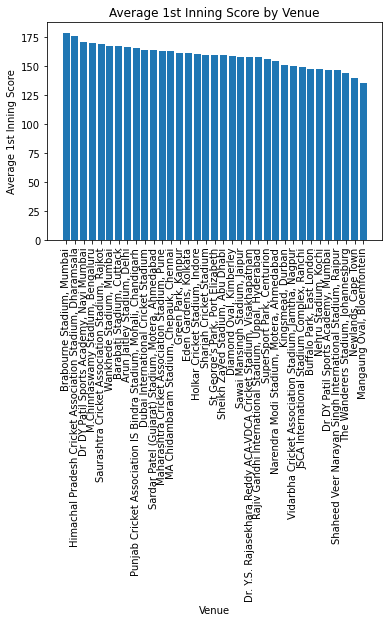

In [10]:
import matplotlib.pyplot as plt

venues = [row['venue'] for row in venue_avg_1st_inning_score.collect()]
avg_scores = [row['avg(1st_inning_runs)'] for row in venue_avg_1st_inning_score.collect()]

plt.bar(venues, avg_scores)
plt.xticks(rotation=90)
plt.xlabel('Venue')
plt.ylabel('Average 1st Inning Score')
plt.title('Average 1st Inning Score by Venue')
plt.show()


In [19]:
from pyspark.sql.functions import col

# Calculate the total number of matches played by each team at each venue
venue_team_total_matches = df.groupBy(['venue', 'home_team']).count().withColumnRenamed('count', 'total_matches')

# Calculate the number of matches won by each team at each venue
venue_team_wins = df.filter(col('winner') == col('home_team')).groupBy(['venue', 'home_team']).count().withColumnRenamed('count', 'wins')

# Join the two data frames to calculate the win percentage for each team at each venue
venue_team_win_percentage = venue_team_wins.join(venue_team_total_matches, ['venue', 'home_team']).withColumn('win_percentage', col('wins') / col('total_matches') * 100)

# Display the results
#venue_team_win_percentage.show()

venue_team_win_percentage.orderBy(venue_team_win_percentage['total_matches'].desc() , venue_team_win_percentage['win_percentage'].desc()).show()


+--------------------+---------+----+-------------+------------------+
|               venue|home_team|wins|total_matches|    win_percentage|
+--------------------+---------+----+-------------+------------------+
|Eden Gardens, Kol...|      KKR|  45|           74|60.810810810810814|
|M.Chinnaswamy Sta...|      RCB|  37|           73| 50.68493150684932|
|Wankhede Stadium,...|       MI|  41|           68| 60.29411764705882|
|Arun Jaitley Stad...|       DC|  29|           65| 44.61538461538462|
|Rajiv Gandhi Inte...|      SRH|  33|           59|55.932203389830505|
|Punjab Cricket As...|     PBKS|  30|           56| 53.57142857142857|
|MA Chidambaram St...|      CSK|  41|           55| 74.54545454545455|
|Sawai Mansingh St...|       RR|  32|           47| 68.08510638297872|
|Maharashtra Crick...|      PWI|   4|           16|              25.0|
|Sardar Patel (Guj...|       RR|   7|           12|58.333333333333336|
|Maharashtra Crick...|      RPS|   5|           11| 45.45454545454545|
|Wankh